In [1]:
#Environment check
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Imports
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [3]:
data = "../input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset"

In [4]:
image_dir = Path(data)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) 

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [5]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("../input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [6]:
image_df

,Filepath,Label
0,../input/augmented-alzheimer-mri-dataset/Augme...,ModerateDemented
1,../input/augmented-alzheimer-mri-dataset/Augme...,ModerateDemented
2,../input/augmented-alzheimer-mri-dataset/Augme...,ModerateDemented
3,../input/augmented-alzheimer-mri-dataset/Augme...,ModerateDemented
4,../input/augmented-alzheimer-mri-dataset/Augme...,ModerateDemented
...,...,...
33979,../input/augmented-alzheimer-mri-dataset/Augme...,MildDemented
33980,../input/augmented-alzheimer-mri-dataset/Augme...,MildDemented
33981,../input/augmented-alzheimer-mri-dataset/Augme...,MildDemented
33982,../input/augmented-alzheimer-mri-dataset/Augme...,MildDemented


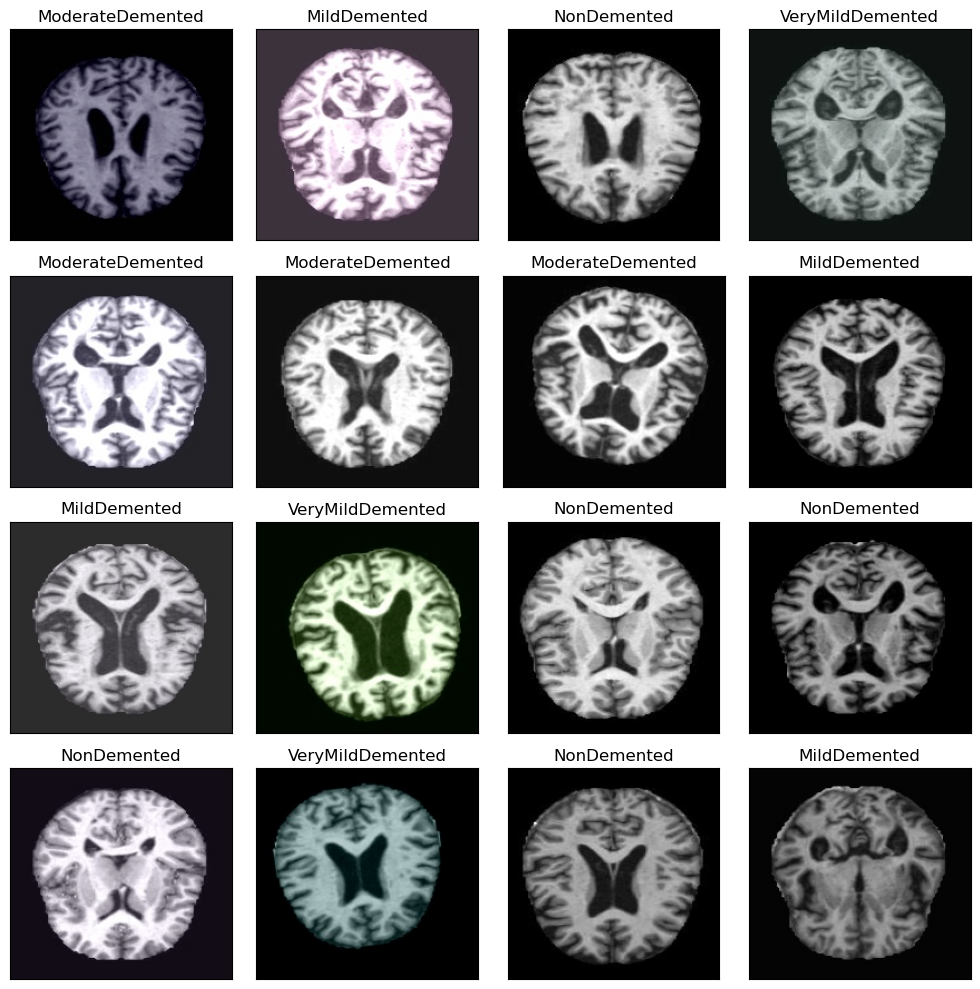

In [7]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2) # set validation split

In [9]:
train_images = train_datagen.flow_from_directory(
    data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_images = train_datagen.flow_from_directory(
    data , # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.


In [10]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.2),
    Dense(4, activation = 'softmax')
])

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history = model.fit(train_images,
    steps_per_epoch=len(train_images),
    validation_data=validation_images,
    validation_steps=len(validation_images),
    epochs=10)

Epoch 1/10
850/850 [==============================] - 809s 949ms/step - loss: 0.8451 - accuracy: 0.6120 - val_loss: 0.5899 - val_accuracy: 0.7322
Epoch 2/10
850/850 [==============================] - 836s 984ms/step - loss: 0.4747 - accuracy: 0.7974 - val_loss: 0.4028 - val_accuracy: 0.8308
Epoch 3/10
850/850 [==============================] - 814s 957ms/step - loss: 0.3008 - accuracy: 0.8761 - val_loss: 0.2852 - val_accuracy: 0.8867
Epoch 4/10
850/850 [==============================] - 811s 954ms/step - loss: 0.2034 - accuracy: 0.9196 - val_loss: 0.2540 - val_accuracy: 0.8958
Epoch 5/10
850/850 [==============================] - 809s 952ms/step - loss: 0.1458 - accuracy: 0.9440 - val_loss: 0.2716 - val_accuracy: 0.8957
Epoch 6/10
850/850 [==============================] - 807s 949ms/step - loss: 0.1089 - accuracy: 0.9574 - val_loss: 0.2324 - val_accuracy: 0.9163
Epoch 7/10
850/850 [==============================] - 810s 953ms/step - loss: 0.0837 - accuracy: 0.9691 - val_loss: 0.3151 -

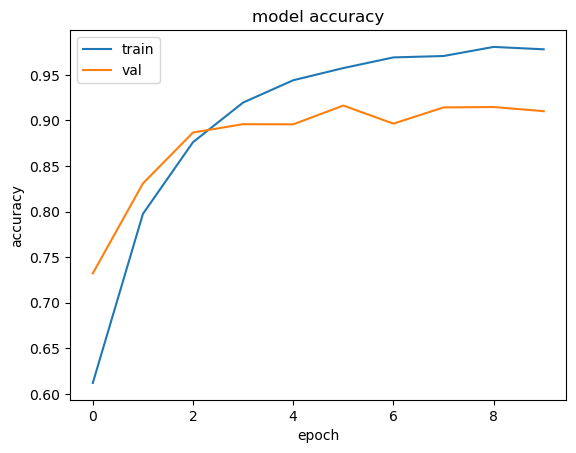

In [12]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

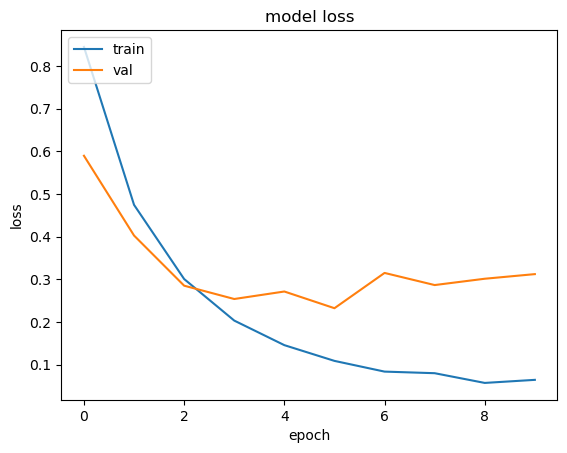

In [13]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()